#Task: AI Powered Travel Chatbot
#Dataset: Travelling dataset
#Writer: Priyanka dhiman
#date: 06-12-2024

# load important lib files

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# load the dataset

In [2]:
df = pd.read_csv('travel_chatbot_dataset.csv')
df.head()

,Trip ID,Destination,Start Date,End Date,Duration (days),Traveler Name,Traveler Age,Accommodation Type,Accommodation Cost,Transportation Type,Transportation Cost,Approximate Annual Tourists,Famous Foods,Best Time to Visit,Safety,Description,Hotel Review
0,TRIP0001,Barcelona,29-12-2022,12-01-2023,14,Ralph Bryant,62,Guesthouse,665,Car Rental,1249,4888361,"Tapas, Paella, Crema Catalana","April to June, September to October",Medium,Barcelona is a beautiful destination known for...,Overpriced for the quality provided. Not worth...
1,TRIP0002,London,08-08-2024,18-08-2024,10,Dana Davis,53,Guesthouse,1836,Train,50,25290610,"Fish and Chips, Roast Dinner, Afternoon Tea","March to May, September to November",Low,London is a beautiful destination known for it...,"Excellent location, very close to tourist attr..."
2,TRIP0003,Dubai,06-03-2024,16-03-2024,10,Tyler Summers,40,Hostel,455,Train,707,15600599,"Shawarma, Stuffed Camel, Al Harees",November to March,High,Dubai is a beautiful destination known for its...,Great experience! Loved the service and cleanl...
3,TRIP0004,Barcelona,11-09-2023,16-09-2023,5,Peter Gregory,68,Hotel,521,Bus,658,5852144,"Tapas, Paella, Crema Catalana","April to June, September to October",Low,Barcelona is a beautiful destination known for...,Great experience! Loved the service and cleanl...
4,TRIP0005,Tokyo,22-06-2024,27-06-2024,5,Richard Martinez,19,Resort,410,Bus,1415,11603542,"Sushi, Ramen, Tempura","March to May, September to November",Medium,Tokyo is a beautiful destination known for its...,Best hotel experience I've ever had! Highly re...


# data information and shape - to know about the data insights

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Trip ID                      1000 non-null   object
 1   Destination                  1000 non-null   object
 2   Start Date                   1000 non-null   object
 3   End Date                     1000 non-null   object
 4   Duration (days)              1000 non-null   int64 
 5   Traveler Name                1000 non-null   object
 6   Traveler Age                 1000 non-null   int64 
 7   Accommodation Type           1000 non-null   object
 8   Accommodation Cost           1000 non-null   int64 
 9   Transportation Type          1000 non-null   object
 10  Transportation Cost          1000 non-null   int64 
 11  Approximate Annual Tourists  1000 non-null   int64 
 12  Famous Foods                 1000 non-null   object
 13  Best Time to Visit           1000 

In [4]:
df.shape

(1000, 17)

# Count the number of missing (NaN) values

In [5]:
df.isnull().sum()

,0
Trip ID,0
Destination,0
Start Date,0
End Date,0
Duration (days),0
Traveler Name,0
Traveler Age,0
Accommodation Type,0
Accommodation Cost,0
Transportation Type,0


In [6]:
df.columns

Index(['Trip ID', 'Destination', 'Start Date', 'End Date', 'Duration (days)',
       'Traveler Name', 'Traveler Age', 'Accommodation Type',
       'Accommodation Cost', 'Transportation Type', 'Transportation Cost',
       'Approximate Annual Tourists', 'Famous Foods', 'Best Time to Visit',
       'Safety', 'Description', 'Hotel Review'],
      dtype='object')

In [7]:
df.iloc[df['Destination'].idxmax()]

,4
Trip ID,TRIP0005
Destination,Tokyo
Start Date,22-06-2024
End Date,27-06-2024
Duration (days),5
Traveler Name,Richard Martinez
Traveler Age,19
Accommodation Type,Resort
Accommodation Cost,410
Transportation Type,Bus


In [8]:
df.iloc[df['Destination'].idxmin()]

,5
Trip ID,TRIP0006
Destination,Bangkok
Start Date,22-07-2023
End Date,28-07-2023
Duration (days),6
Traveler Name,April Woodward
Traveler Age,43
Accommodation Type,Hostel
Accommodation Cost,715
Transportation Type,Flight


In [9]:
# Destination by maximum cost
df.iloc[df['Transportation Cost'].idxmax()]['Destination']

'Tokyo'

In [10]:
# Destination by minimum cost
df.iloc[df['Transportation Cost'].idxmin()]['Destination']

'London'

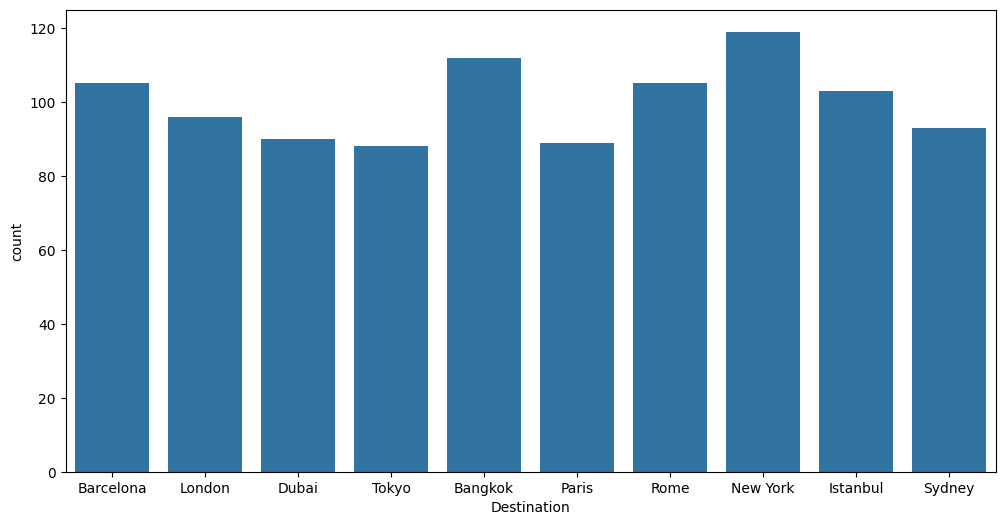

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x='Destination',data=df)
plt.show()

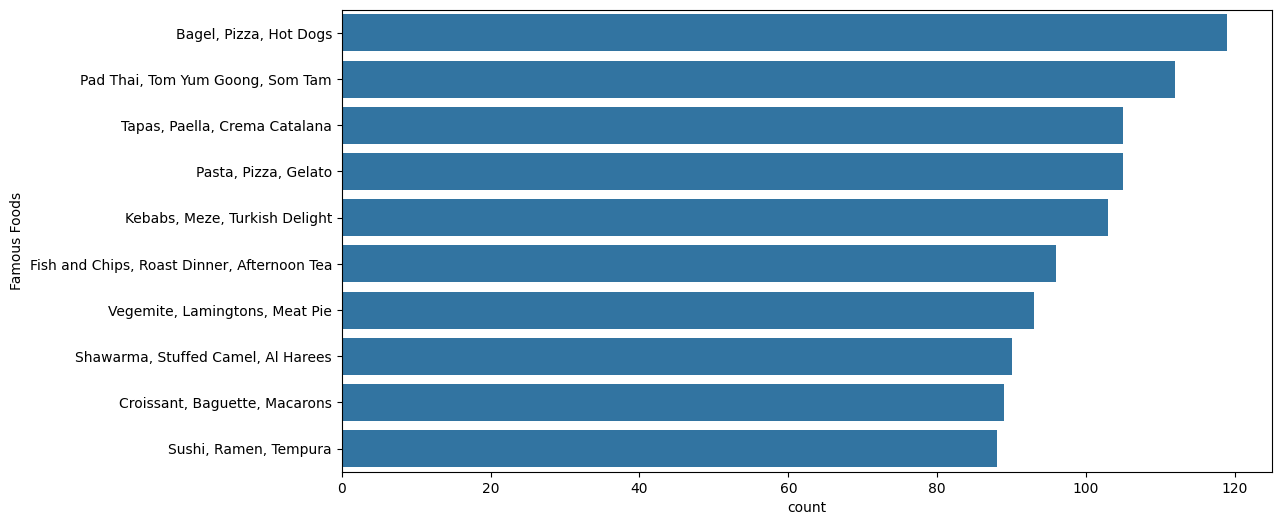

In [12]:
plt.figure(figsize=(12,6))
data=df['Famous Foods'].value_counts()
sns.barplot(y=data.index,x=data,orient='h')
plt.show()

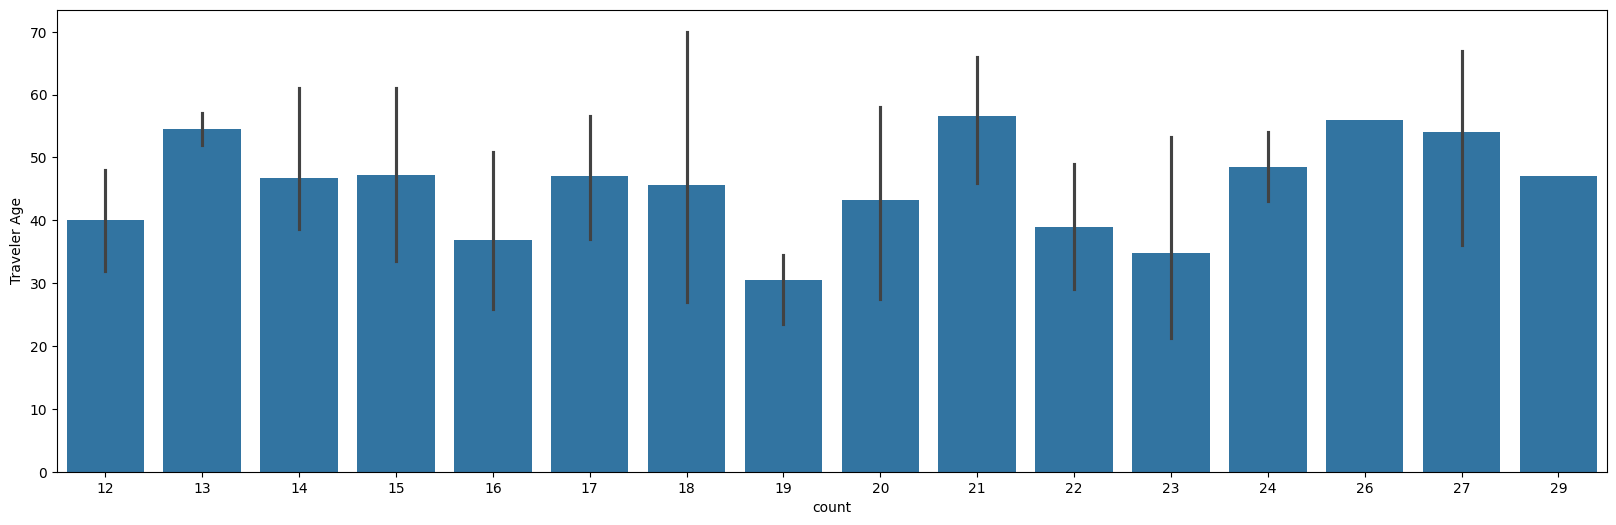

In [13]:
plt.figure(figsize=(20,6))
data=df['Traveler Age'].value_counts()
sns.barplot(y=data.index,x=data)
plt.show()

# best

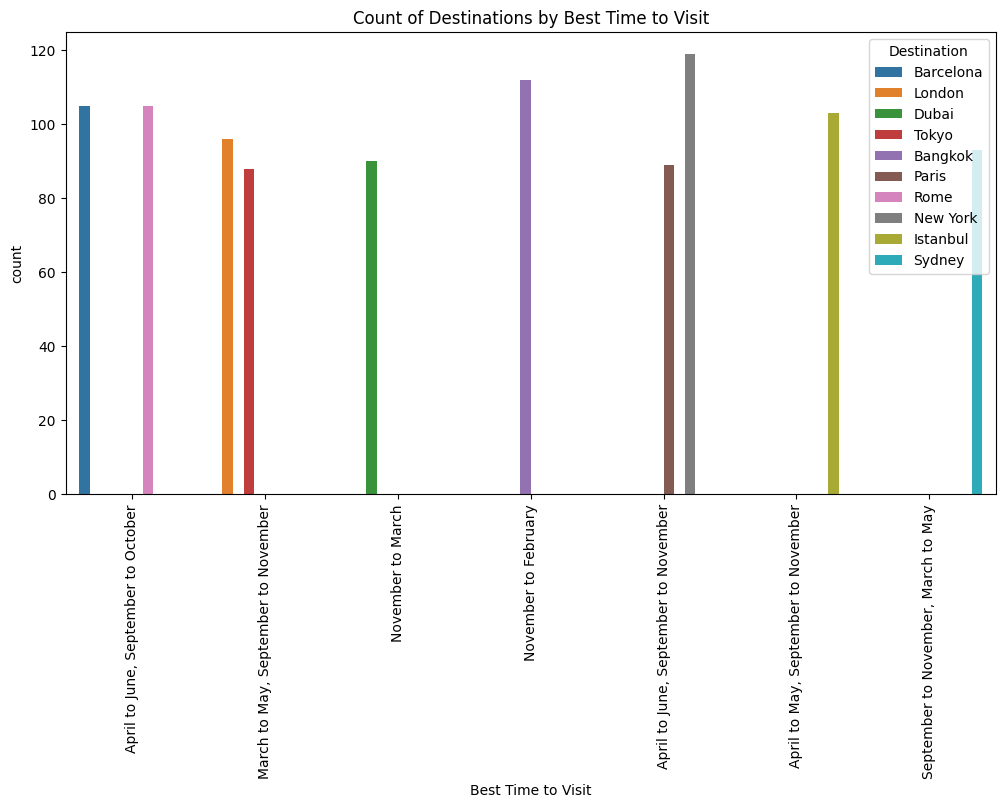

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Best Time to Visit', hue='Destination', data=df)
plt.title('Count of Destinations by Best Time to Visit')
plt.xticks(rotation=90)
plt.show()

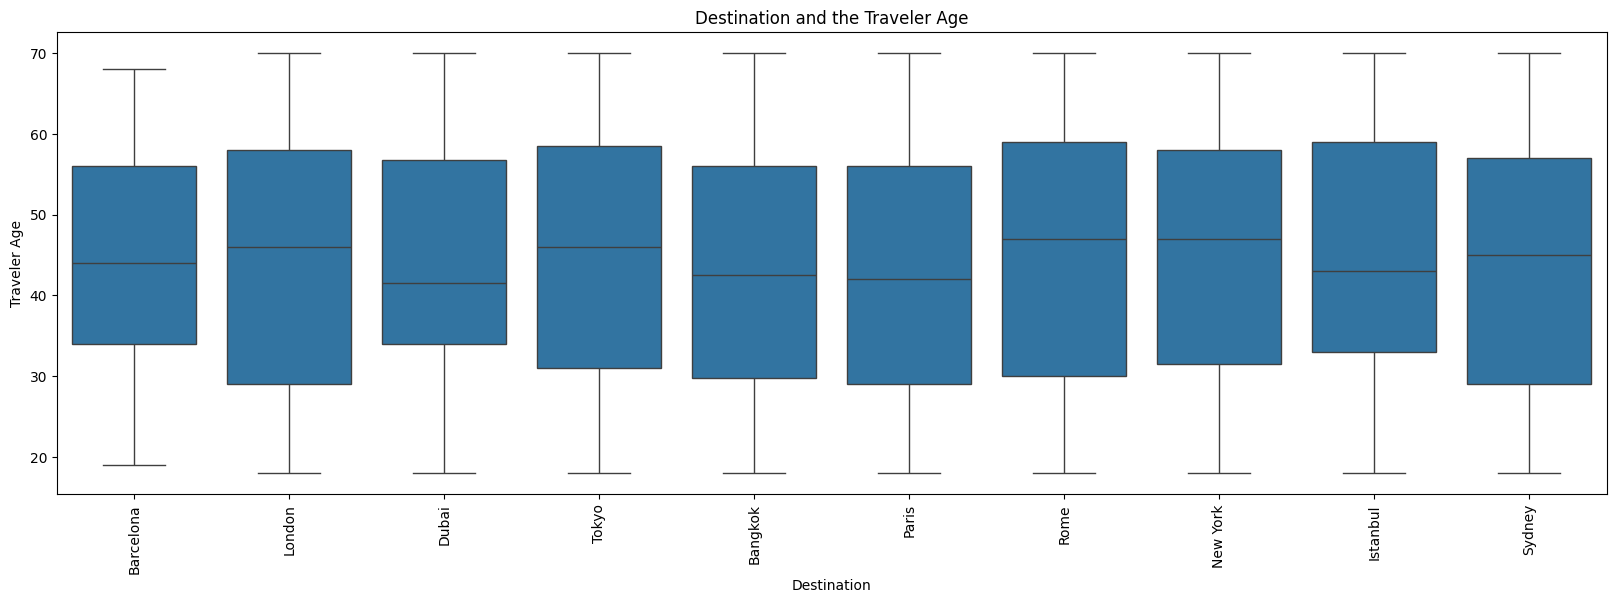

In [15]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='Destination', y='Traveler Age', data=df)
plt.title('Destination and the Traveler Age')
plt.xticks(rotation=90)
plt.show()

In [16]:
df['Destination'] = df['Destination'].map({'Barcelona': 0, 'London': 1,'Dubai':2,'Tokyo':3,'Bangkok':4,'Paris':5,'Rome':6,'New York':7,'Istanbul':8,'Sydney':9})

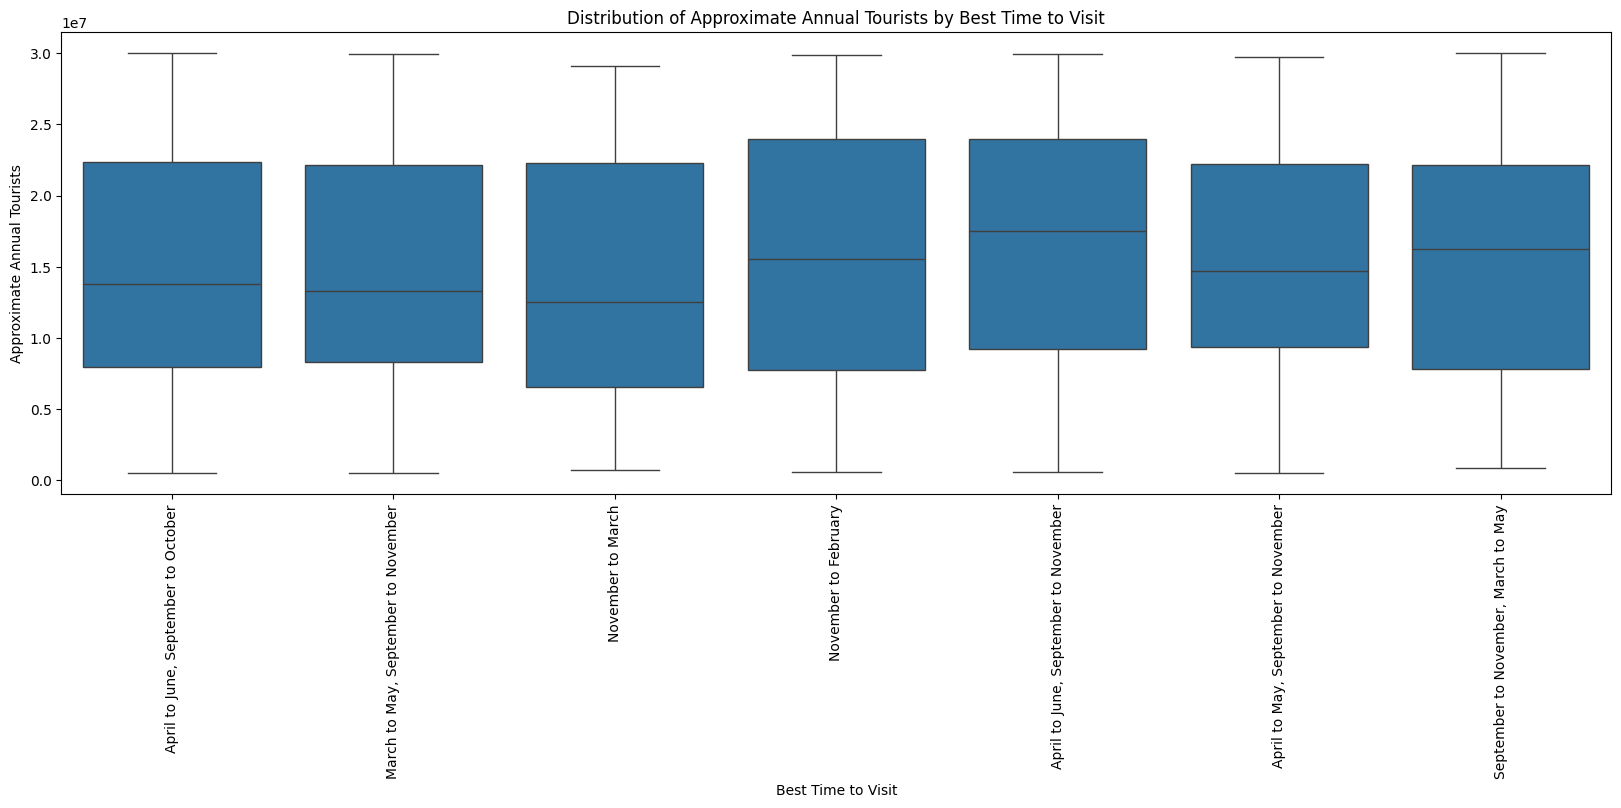

In [17]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='Best Time to Visit', y='Approximate Annual Tourists', data=df)
plt.title('Distribution of Approximate Annual Tourists by Best Time to Visit')
plt.xticks(rotation=90)
plt.show()

In [18]:
df.isna().sum()

,0
Trip ID,0
Destination,0
Start Date,0
End Date,0
Duration (days),0
Traveler Name,0
Traveler Age,0
Accommodation Type,0
Accommodation Cost,0
Transportation Type,0


In [19]:
df.drop(columns=['Traveler Name'],inplace=True)

In [20]:
df.describe()

,Destination,Duration (days),Traveler Age,Accommodation Cost,Transportation Cost,Approximate Annual Tourists
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,4.557000,8.587000,44.170000,1018.270000,793.659000,1.531572e+07
std,2.871061,3.443587,15.418782,532.893006,418.765499,8.526610e+06
min,0.000000,3.000000,18.000000,101.000000,50.000000,5.164430e+05
25%,2.000000,6.000000,31.000000,567.000000,415.750000,8.244545e+06
50%,5.000000,9.000000,44.000000,1012.000000,799.000000,1.492316e+07
75%,7.000000,12.000000,58.000000,1452.000000,1177.500000,2.258588e+07
max,9.000000,14.000000,70.000000,1995.000000,1499.000000,2.999936e+07


In [21]:
df['Accommodation Cost'].value_counts()

,count
Accommodation Cost,
845,4
1056,4
722,3
1593,3
965,3
...,...
1021,1
1352,1
1531,1


In [22]:
df[df['Accommodation Cost'] > 1352]

,Trip ID,Destination,Start Date,End Date,Duration (days),Traveler Age,Accommodation Type,Accommodation Cost,Transportation Type,Transportation Cost,Approximate Annual Tourists,Famous Foods,Best Time to Visit,Safety,Description,Hotel Review
1,TRIP0002,1,08-08-2024,18-08-2024,10,53,Guesthouse,1836,Train,50,25290610,"Fish and Chips, Roast Dinner, Afternoon Tea","March to May, September to November",Low,London is a beautiful destination known for it...,"Excellent location, very close to tourist attr..."
8,TRIP0009,5,29-05-2023,10-06-2023,12,32,Resort,1824,Train,1055,23684937,"Croissant, Baguette, Macarons","April to June, September to November",Medium,Paris is a beautiful destination known for its...,"Had some issues with room service, but overall..."
11,TRIP0012,5,26-03-2023,29-03-2023,3,53,Hotel,1683,Flight,215,14461728,"Croissant, Baguette, Macarons","April to June, September to November",Medium,Paris is a beautiful destination known for its...,Great experience! Loved the service and cleanl...
13,TRIP0014,7,05-12-2023,17-12-2023,12,25,Airbnb,1582,Flight,697,28785021,"Bagel, Pizza, Hot Dogs","April to June, September to November",High,New York is a beautiful destination known for ...,"The hotel was nice, but the room was a bit small."
14,TRIP0015,8,06-02-2024,16-02-2024,10,36,Hotel,1415,Bus,1427,825107,"Kebabs, Meze, Turkish Delight","April to May, September to November",High,Istanbul is a beautiful destination known for ...,"Comfortable bed, clean room, and great view!"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,TRIP0982,6,16-06-2023,19-06-2023,3,41,Airbnb,1804,Car Rental,1257,517588,"Pasta, Pizza, Gelato","April to June, September to October",Low,Rome is a beautiful destination known for its ...,"Had some issues with room service, but overall..."
985,TRIP0986,7,17-12-2023,21-12-2023,4,36,Guesthouse,1475,Flight,787,4672157,"Bagel, Pizza, Hot Dogs","April to June, September to November",High,New York is a beautiful destination known for ...,The staff was friendly and helpful. Would stay...
988,TRIP0989,4,20-10-2023,26-10-2023,6,45,Guesthouse,1452,Car Rental,1022,29750200,"Pad Thai, Tom Yum Goong, Som Tam",November to February,High,Bangkok is a beautiful destination known for i...,Overpriced for the quality provided. Not worth...
994,TRIP0995,5,19-02-2023,27-02-2023,8,42,Resort,1394,Car Rental,572,24771931,"Croissant, Baguette, Macarons","April to June, September to November",High,Paris is a beautiful destination known for its...,The staff was friendly and helpful. Would stay...


In [23]:
df.drop(columns=['Trip ID'], inplace=True)

# data corelation

In [24]:
df.drop(columns=['Start Date', 'End Date','Description','Hotel Review','Famous Foods'], inplace=True)


In [25]:
#Label Encodng for the Transportation Type,Accommodation Type

from sklearn.preprocessing import LabelEncoder
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Transportation Type'.
df['Transportation Type']= label_encoder.fit_transform(df['Transportation Type'])

df['Transportation Type'].unique()

array([1, 3, 0, 2])

In [26]:
df['Accommodation Type']= label_encoder.fit_transform(df['Accommodation Type'])

df['Accommodation Type'].unique()

array([1, 2, 3, 4, 0])

In [27]:
df['Best Time to Visit']= label_encoder.fit_transform(df['Best Time to Visit'])

df['Best Time to Visit'].unique()

array([1, 3, 5, 4, 0, 2, 6])

In [28]:
df['Safety'] = df['Safety'].map({'Low': 0, 'Medium': 1,'High':2})

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Destination                  1000 non-null   int64
 1   Duration (days)              1000 non-null   int64
 2   Traveler Age                 1000 non-null   int64
 3   Accommodation Type           1000 non-null   int64
 4   Accommodation Cost           1000 non-null   int64
 5   Transportation Type          1000 non-null   int64
 6   Transportation Cost          1000 non-null   int64
 7   Approximate Annual Tourists  1000 non-null   int64
 8   Best Time to Visit           1000 non-null   int64
 9   Safety                       1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


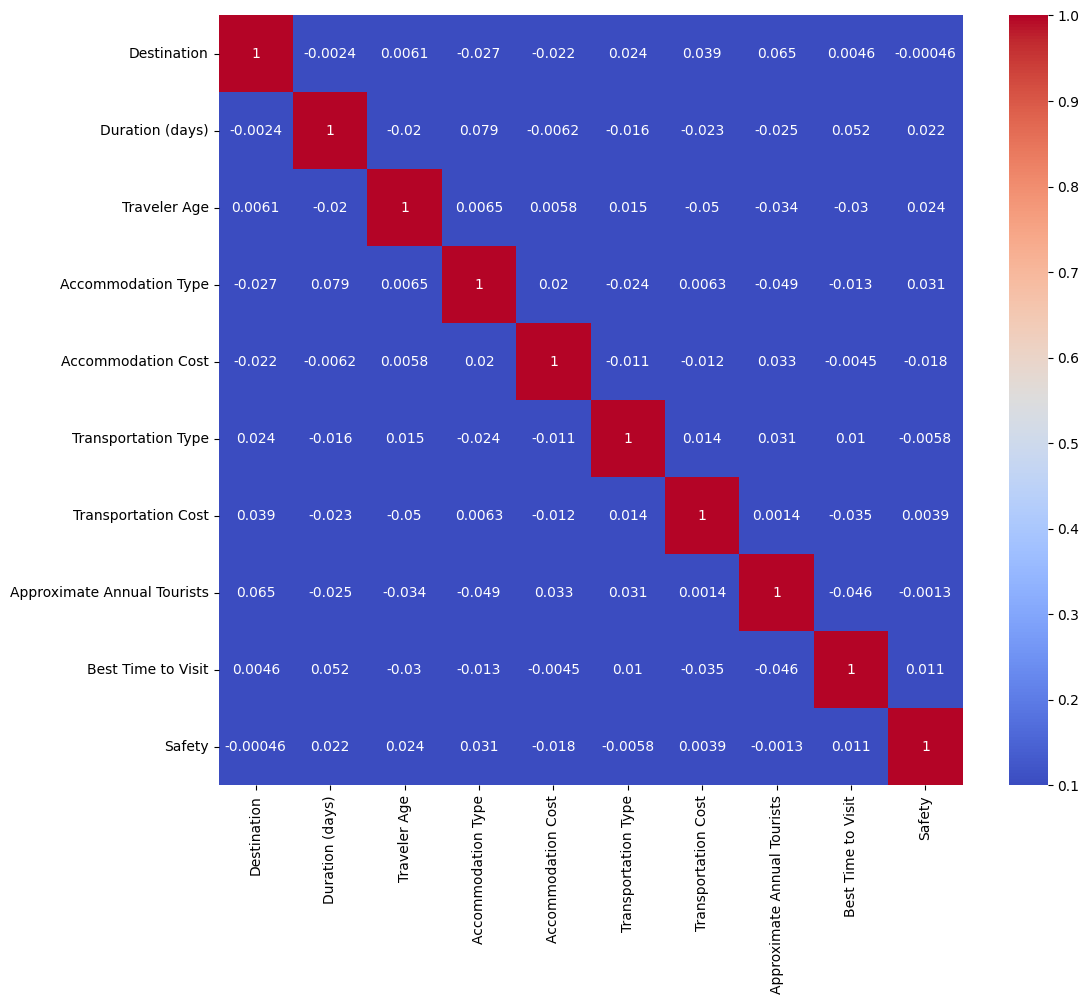

In [30]:
corr = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,vmin=0.1,cmap='coolwarm')
plt.show()

#Create test train Split

In [31]:
df.columns

Index(['Destination', 'Duration (days)', 'Traveler Age', 'Accommodation Type',
       'Accommodation Cost', 'Transportation Type', 'Transportation Cost',
       'Approximate Annual Tourists', 'Best Time to Visit', 'Safety'],
      dtype='object')

In [33]:
df_vars=['Destination', 'Duration (days)', 'Traveler Age', 'Accommodation Type',
       'Accommodation Cost', 'Transportation Type', 'Approximate Annual Tourists', 'Best Time to Visit', 'Safety']

In [34]:
X=df[df_vars]
y=df['Transportation Cost']

In [35]:
X

,Destination,Duration (days),Traveler Age,Accommodation Type,Accommodation Cost,Transportation Type,Approximate Annual Tourists,Best Time to Visit,Safety
0,0,14,62,1,665,1,4888361,1,1
1,1,10,53,1,1836,3,25290610,3,0
2,2,10,40,2,455,3,15600599,5,2
3,0,5,68,3,521,0,5852144,1,0
4,3,5,19,4,410,0,11603542,3,1
...,...,...,...,...,...,...,...,...,...
995,6,8,62,0,342,3,9635649,1,1
996,3,9,52,4,616,3,26057509,3,0
997,6,3,55,2,934,3,27991393,1,1
998,0,7,49,2,1061,1,18897941,1,1


In [36]:
y

,Transportation Cost
0,1249
1,50
2,707
3,658
4,1415
...,...
995,938
996,379
997,234
998,1198


In [39]:
from sklearn.model_selection import train_test_split
train_X,val_X,train_y,val_y = train_test_split(X,y,test_size=0.3,random_state=2)

In [41]:
train_X.shape

(700, 9)

In [43]:
train_y.shape

(700,)

# fir the model in training Data

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_clf = LinearDiscriminantAnalysis()

In [46]:
lda_clf.fit(train_X,train_y)

LinearDiscriminantAnalysis()

In [47]:
pred_value=lda_clf.predict(val_X)